In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/dl_pojects/

/content/drive/MyDrive/dl_pojects


In [3]:
!pwd

/content/drive/MyDrive/dl_pojects


In [4]:
import os
import json

import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

from model import resnet34

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

data_transform = transforms.Compose(
    [transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

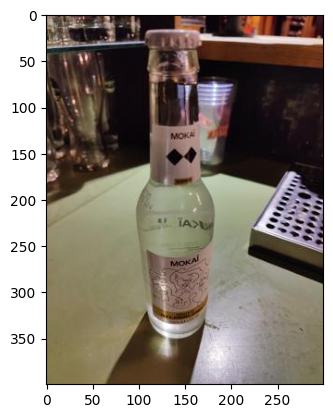

In [19]:
 # load image
img_path = "./imgs_test2/IMG20241208021951.jpg"
assert os.path.exists(img_path), "file: '{}' dose not exist.".format(img_path)
img = Image.open(img_path)
plt.imshow(img)
# [N, C, H, W]
img = data_transform(img)
# expand batch dimension
img = torch.unsqueeze(img, dim=0)

In [20]:
# read class_indict
json_path = './class_indices.json'
assert os.path.exists(json_path), "file: '{}' dose not exist.".format(json_path)
with open(json_path, "r") as f:
    class_indict = json.load(f)
# create model
model = resnet34(num_classes=48).to(device)
# load model weights
weights_path = "./resNet34.pth"
assert os.path.exists(weights_path), "file: '{}' dose not exist.".format(weights_path)
model.load_state_dict(torch.load(weights_path, map_location=device))

<ipython-input-20-4634d33dadee>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights_path, map_location=device))


<All keys matched successfully>

class: daura: 55dkk   prob: 0.00434
class: ginger_beer_without: 45dkk   prob: 0.0118
class: blanc: 45dkk   prob: 0.0112
class: fynsk_foraar: 45dkk   prob: 0.00342
class: mokai: 45dkk   prob: 0.0739
class: punk_ipa_without: 55dkk   prob: 0.00548
class: ginger_beer: 55dkk   prob: 0.0134
class: thor_pilsner: 28dkk   prob: 0.013
class: thor_classic: 34dkk   prob: 0.006
class: odense_classic: 34dkk   prob: 0.00661
class: odense_pilsner: 28dkk   prob: 0.0176
class: hazy_jane: 55dkk   prob: 0.024
class: grimbergen_blonde: 45dkk   prob: 0.00658
class: grimbergen_double: 45dkk   prob: 0.00345
class: s_smith_chocolade: 55dkk   prob: 0.0103
class: s_smith_apricot: 55dkk   prob: 0.0311
class: trapist_8: 55dkk   prob: 0.00538
class: s_smith_stout: 55dkk   prob: 0.0362
class: mirinda: 28dkk   prob: 0.00946
class: 7_up: 28dkk   prob: 0.0808
class: schweps: 28dkk   prob: 0.00887
class: tonic: 28dkk   prob: 0.0279
class: tuborg_guld: 40dkk   prob: 0.0706
class: blaaa_thor: 40dkk   prob: 0.00761
class: 

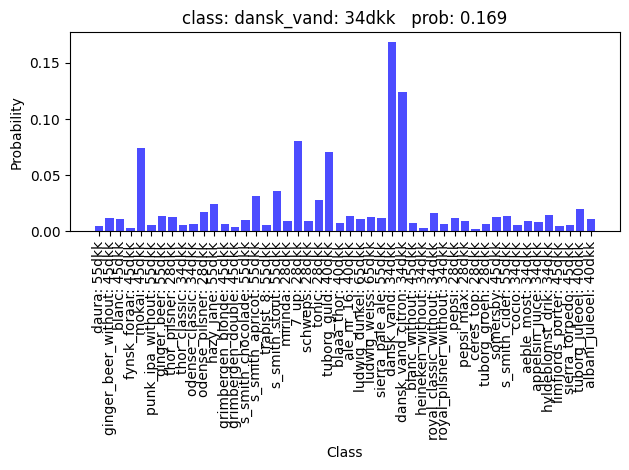

In [21]:
import matplotlib.pyplot as plt
import numpy as np
model.eval()
with torch.no_grad():
    # predict class
    output = torch.squeeze(model(img.to(device))).cpu()
    predict = torch.softmax(output, dim=0)
    predict_cla = torch.argmax(predict).numpy()

print_res = "class: {}   prob: {:.3}".format(class_indict[str(predict_cla)],
                                             predict[predict_cla].numpy())
plt.title(print_res)

plt.bar(np.arange(len(predict)), predict.numpy(), color='blue', alpha=0.7)
plt.xticks(np.arange(len(predict)), [class_indict[str(i)] for i in range(len(predict))], rotation=90)

for i in range(len(predict)):
    print("class: {:10}   prob: {:.3}".format(class_indict[str(i)],
                                              predict[i].numpy()))

plt.xlabel("Class")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

In [10]:
import os
import pandas as pd
import torch
from PIL import Image
import json
import matplotlib.pyplot as plt
import numpy as np

In [11]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Data Preprocessing
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
# Load tag mapping（class_indices.json）
json_path = './class_indices.json'
assert os.path.exists(json_path), f"file: '{json_path}' does not exist."
with open(json_path, "r") as f:
    class_indict = json.load(f)

In [12]:
# Create the model and load the weights
model = resnet34(num_classes=48).to(device)
weights_path = "./resNet34.pth"
assert os.path.exists(weights_path), f"file: '{weights_path}' does not exist."
model.load_state_dict(torch.load(weights_path, map_location=device))
model.eval()
# Load the Excel file for the test data set
excel_path = './data_test_2.xlsx'
assert os.path.exists(excel_path), f"file: '{excel_path}' does not exist."
df = pd.read_excel(excel_path)

<ipython-input-12-4d2a8c60caa9>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights_path, map_location=device))


In [13]:
correct = 0
total = 0


test_images_dir = './imgs_test2'

# Traverse the file names and labels in the Excel file
for idx, row in df.iterrows():
    filename = row['filename']
    true_label = row['label']

    img_path = os.path.join(test_images_dir, filename)
    if not os.path.exists(img_path):
        print(f"Warning: Image {img_path} not found, skipping...")
        continue

    img = Image.open(img_path).convert('RGB')
    img = data_transform(img)
    img = torch.unsqueeze(img, dim=0).to(device)

    # prediction
    with torch.no_grad():
        output = torch.squeeze(model(img)).cpu()
        predict = torch.softmax(output, dim=0)
        predict_cla = torch.argmax(predict).item()


    if predict_cla == true_label:
        correct += 1
    total += 1

    print(f"Image: {filename}, True Label: {true_label}, Predicted: {predict_cla}, Probability: {predict[predict_cla]:.3f}")

accuracy = correct / total * 100 if total > 0 else 0
print(f"Accuracy: {accuracy:.2f}%")


Image: IMG20241207222516.jpg, True Label: 39, Predicted: 39, Probability: 0.719
Image: IMG20241207222519.jpg, True Label: 39, Predicted: 39, Probability: 0.810
Image: IMG20241207222523.jpg, True Label: 39, Predicted: 39, Probability: 0.928
Image: IMG20241207222642.jpg, True Label: 38, Predicted: 38, Probability: 0.499
Image: IMG20241207222645.jpg, True Label: 38, Predicted: 38, Probability: 0.469
Image: IMG20241207222649.jpg, True Label: 38, Predicted: 38, Probability: 0.393
Image: IMG20241207222650.jpg, True Label: 38, Predicted: 38, Probability: 0.305
Image: IMG20241207222744.jpg, True Label: 37, Predicted: 37, Probability: 0.727
Image: IMG20241207222747.jpg, True Label: 37, Predicted: 37, Probability: 0.798
Image: IMG20241207222750.jpg, True Label: 37, Predicted: 37, Probability: 0.785
Image: IMG20241207222926.jpg, True Label: 37, Predicted: 37, Probability: 0.855
Image: IMG20241207222939.jpg, True Label: 36, Predicted: 36, Probability: 0.417
Image: IMG20241207222941.jpg, True Label